위암 유전자 발현 데이터 세트에서 DEGs 추출(GSE29272)

##0. 패키지 설치

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install(c("GEOquery", "limma", "AnnotationDbi", "hgu133plus2.db"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Installing package(s) 'BiocVersion', 'GEOquery', 'limma', 'AnnotationDbi',
  'hgu133plus2.db'

also installing the dependencies ‘bitops’, ‘zlibbioc’, ‘RCurl’, ‘GenomeInfoDbData’, ‘XVector’, ‘GenomeInfoDb’, ‘R.oo’, ‘R.methodsS3’, ‘plogr’, ‘png’, ‘Biostrings’, ‘Biobase’, ‘R.utils’, ‘statmod’, ‘BiocGenerics’, ‘IRanges’, ‘RSQLite’, ‘S4Vectors’, ‘KEGGREST’, ‘org.Hs.eg.db’


Old packages: 'bit', 'curl', 'dbplyr', 'devtools', 'gargle', 'highr',
  'isoband', 'openssl', 'ragg', 'roxygen2', 'textshaping', 'utf8', 'whisker',
  'boot'



## 2. 데이터 불러오기 및 정규화

In [ ]:
library(GEOquery)

# GEO 데이터베이스에서 데이터셋 가져오기
gse <- getGEO("GSE29272", GSEMatrix =TRUE, getGPL=FALSE)
gse <- gse[[1]]

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Setting options('download.file.method.GEOquery'='auto')

Setting options('GEOquery.inmemory.gpl'=FALSE)

Found 1 file(s)

GSE29272_series_matrix.

In [ ]:
gse

ExpressionSet (storageMode: lockedEnvironment)
assayData: 22283 features, 268 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM723464 GSM723465 ... GSM723731 (268 total)
  varLabels: title geo_accession ... tissue:ch1 (32 total)
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
  pubMedIds: 23717493
24867265 
Annotation: GPL96 

In [ ]:
var_labels <- pData(gse)
head(var_labels)

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,⋯,contact_phone,contact_institute,contact_address,contact_city,contact_state,contact_zip/postal_code,contact_country,supplementary_file,data_row_count,tissue:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM723464,adjacent tissue normal glands TYB0001N,GSM723464,Public on Jul 19 2013,May 12 2011,Jul 19 2013,RNA,1,adjacent normal tissue,Homo sapiens,tissue: adjacent tissue normal gastric glands,⋯,2402765257,NCI,9609 Medical Center Dr.,Rockville,MD,20850,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM723nnn/GSM723464/suppl/GSM723464_TYB0001N.CEL.gz,22283,adjacent tissue normal gastric glands
GSM723465,tumor tissue non-cardia of gastric TYB0001T,GSM723465,Public on Jul 19 2013,May 12 2011,Jul 19 2013,RNA,1,tumor tissue,Homo sapiens,tissue: tumor tissue non-cardia of stomach,⋯,2402765257,NCI,9609 Medical Center Dr.,Rockville,MD,20850,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM723nnn/GSM723465/suppl/GSM723465_TYB0001T.CEL.gz,22283,tumor tissue non-cardia of stomach
GSM723466,adjacent tissue normal glands TYB0002N,GSM723466,Public on Jul 19 2013,May 12 2011,Jul 19 2013,RNA,1,adjacent normal tissue,Homo sapiens,tissue: adjacent tissue normal gastric glands,⋯,2402765257,NCI,9609 Medical Center Dr.,Rockville,MD,20850,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM723nnn/GSM723466/suppl/GSM723466_TYB0002N.CEL.gz,22283,adjacent tissue normal gastric glands
GSM723467,tumor tissue non-cardia of gastric TYB0002T,GSM723467,Public on Jul 19 2013,May 12 2011,Jul 19 2013,RNA,1,tumor tissue,Homo sapiens,tissue: tumor tissue non-cardia of stomach,⋯,2402765257,NCI,9609 Medical Center Dr.,Rockville,MD,20850,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM723nnn/GSM723467/suppl/GSM723467_TYB0002T.CEL.gz,22283,tumor tissue non-cardia of stomach
GSM723468,adjacent tissue normal glands TYB0003N,GSM723468,Public on Jul 19 2013,May 12 2011,Jul 19 2013,RNA,1,adjacent normal tissue,Homo sapiens,tissue: adjacent tissue normal gastric glands,⋯,2402765257,NCI,9609 Medical Center Dr.,Rockville,MD,20850,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM723nnn/GSM723468/suppl/GSM723468_TYB0003N.CEL.gz,22283,adjacent tissue normal gastric glands
GSM723469,tumor tissue non-cardia of gastric TYB0003T,GSM723469,Public on Jul 19 2013,May 12 2011,Jul 19 2013,RNA,1,tumor tissue,Homo sapiens,tissue: tumor tissue non-cardia of stomach,⋯,2402765257,NCI,9609 Medical Center Dr.,Rockville,MD,20850,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM723nnn/GSM723469/suppl/GSM723469_TYB0003T.CEL.gz,22283,tumor tissue non-cardia of stomach


In [ ]:
library(limma)

# 데이터 전처리
gse <- gse[, !duplicated(colnames(gse))]
eset <- exprs(gse)

# 정규화
eset <-  normalizeQuantiles(eset)


Attaching package: ‘limma’


The following object is masked from ‘package:BiocGenerics’:

    plotMA




In [ ]:
head(eset)

,GSM723464,GSM723465,GSM723466,GSM723467,GSM723468,GSM723469,GSM723470,GSM723471,GSM723472,GSM723473,⋯,GSM723722,GSM723723,GSM723724,GSM723725,GSM723726,GSM723727,GSM723728,GSM723729,GSM723730,GSM723731
1007_s_at,10.135819,10.043082,9.958234,9.147651,9.947632,10.564783,9.967506,9.434397,10.572604,10.584176,⋯,10.560171,10.585950,9.656028,10.927780,10.188768,10.710949,10.362343,10.136794,9.835016,9.422564
1053_at,6.591476,6.649237,6.530023,6.580614,6.562000,6.797549,6.577244,6.833271,6.856450,6.619247,⋯,6.861443,6.457348,6.628279,6.445431,6.435887,6.581055,6.657738,6.493463,6.599033,6.576242
117_at,7.238879,7.358780,7.238711,7.725495,7.251411,7.454012,7.366415,7.630668,7.454809,7.639113,⋯,7.375569,7.323226,7.442244,7.247287,7.267956,7.307067,7.232080,7.430618,7.710022,7.669323
121_at,9.477626,9.221343,9.038345,9.040303,9.207416,9.338828,9.456510,9.062162,9.678873,9.175767,⋯,9.578055,9.444955,9.397346,9.410542,9.125001,9.620301,9.714119,9.670339,9.154884,9.469591
1255_g_at,4.919951,4.911299,4.919282,4.845445,4.926403,5.256763,4.980454,4.818163,4.984327,4.829612,⋯,4.951761,4.844326,4.967672,4.914489,4.809746,5.262019,4.849574,4.883602,4.801821,4.799971
1294_at,8.575546,8.916676,8.812384,8.775797,8.686414,8.070168,8.550247,8.236480,8.388264,8.480598,⋯,8.906315,8.620156,8.919917,9.117572,9.346250,8.870374,8.934906,10.163316,8.419346,8.717986


In [ ]:
library(AnnotationDbi)
library(hgu133plus2.db)

# eset에서 프로브 ID 추출
probe_ids <- rownames(eset)
anno_data <- select(hgu133plus2.db, keys = probe_ids, columns = "SYMBOL", keytype = "PROBEID")
anno_data_unique <- anno_data[!duplicated(anno_data$PROBEID), ]
new_row_names <- anno_data_unique$SYMBOL[match(probe_ids, anno_data_unique$PROBEID)]
new_row_names[is.na(new_row_names)] <- "UNKNOWN"
# eset의 행 이름을 업데이트
filtered_eset <- eset
rownames(filtered_eset) <- new_row_names
# UNKNOWN 제거
filtered_eset <- filtered_eset[rownames(filtered_eset) != "UNKNOWN", ]
head(filtered_eset)

Loading required package: stats4

Loading required package: IRanges

Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: org.Hs.eg.db





'select()' returned 1:many mapping between keys and columns



,GSM723464,GSM723465,GSM723466,GSM723467,GSM723468,GSM723469,GSM723470,GSM723471,GSM723472,GSM723473,⋯,GSM723722,GSM723723,GSM723724,GSM723725,GSM723726,GSM723727,GSM723728,GSM723729,GSM723730,GSM723731
DDR1,10.135819,10.043082,9.958234,9.147651,9.947632,10.564783,9.967506,9.434397,10.572604,10.584176,⋯,10.560171,10.585950,9.656028,10.927780,10.188768,10.710949,10.362343,10.136794,9.835016,9.422564
RFC2,6.591476,6.649237,6.530023,6.580614,6.562000,6.797549,6.577244,6.833271,6.856450,6.619247,⋯,6.861443,6.457348,6.628279,6.445431,6.435887,6.581055,6.657738,6.493463,6.599033,6.576242
HSPA6,7.238879,7.358780,7.238711,7.725495,7.251411,7.454012,7.366415,7.630668,7.454809,7.639113,⋯,7.375569,7.323226,7.442244,7.247287,7.267956,7.307067,7.232080,7.430618,7.710022,7.669323
PAX8,9.477626,9.221343,9.038345,9.040303,9.207416,9.338828,9.456510,9.062162,9.678873,9.175767,⋯,9.578055,9.444955,9.397346,9.410542,9.125001,9.620301,9.714119,9.670339,9.154884,9.469591
GUCA1A,4.919951,4.911299,4.919282,4.845445,4.926403,5.256763,4.980454,4.818163,4.984327,4.829612,⋯,4.951761,4.844326,4.967672,4.914489,4.809746,5.262019,4.849574,4.883602,4.801821,4.799971
UBA7,8.575546,8.916676,8.812384,8.775797,8.686414,8.070168,8.550247,8.236480,8.388264,8.480598,⋯,8.906315,8.620156,8.919917,9.117572,9.346250,8.870374,8.934906,10.163316,8.419346,8.717986


In [ ]:
gse$title

[1] "adjacent tissue normal glands TYB0001N"     
  [2] "tumor tissue non-cardia of gastric TYB0001T"
  [3] "adjacent tissue normal glands TYB0002N"     
  [4] "tumor tissue non-cardia of gastric TYB0002T"
  [5] "adjacent tissue normal glands TYB0003N"     
  [6] "tumor tissue non-cardia of gastric TYB0003T"
  [7] "adjacent tissue normal glands TYB0004N"     
  [8] "tumor tissue non-cardia of gastric TYB0004T"
  [9] "adjacent tissue normal glands TYB0005N"     
 [10] "tumor tissue non-cardia of gastric TYB0005T"
 [11] "adjacent tissue normal glands TYB0006N"     
 [12] "tumor tissue non-cardia of gastric TYB0006T"
 [13] "adjacent tissue normal glands TYB0007N"     
 [14] "tumor tissue non-cardia of gastric TYB0007T"
 [15] "adjacent tissue normal glands TYB0008N"     
 [16] "tumor tissue non-cardia of gastric TYB0008T"
 [17] "adjacent tissue normal glands TYB0009N"     
 [18] "tumor tissue non-cardia of gastric TYB0009T"
 [19] "adjacent tissue normal glands TYB0010N"     
 [20] "tumor tissue non-cardia of gastric TYB0010T"
 [21] "adjacent tissue normal glands TYB0011N"     
 [22] "tumor tissue non-cardia of gastric TYB0011T"
 [23] "adjacent tissue normal glands TYB0012N"     
 [24] "tumor tissue non-cardia of gastric TYB0012T"
 [25] "adjacent tissue normal glands TYB0013N"     
 [26] "tumor tissue non-cardia of gastric TYB0013T"
 [27] "adjacent tissue normal glands TYB0014N"     
 [28] "tumor tissue non-cardia of gastric TYB0014T"
 [29] "adjacent tissue normal glands TYB0015N"     
 [30] "tumor tissue non-cardia of gastric TYB0015T"
 [31] "adjacent tissue normal glands TYB0016N"     
 [32] "tumor tissue non-cardia of gastric TYB0016T"
 [33] "adjacent tissue normal glands TYB0017N"     
 [34] "tumor tissue non-cardia of gastric TYB0017T"
 [35] "adjacent tissue normal glands TYB0018N"     
 [36] "tumor tissue non-cardia of gastric TYB0018T"
 [37] "adjacent tissue normal glands TYB0019N"     
 [38] "tumor tissue non-cardia of gastric TYB0019T"
 [39] "adjacent tissue normal glands TYB0020N"     
 [40] "tumor tissue non-cardia of gastric TYB0020T"
 [41] "adjacent tissue normal glands TYB0021N"     
 [42] "tumor tissue non-cardia of gastric TYB0021T"
 [43] "adjacent tissue normal glands TYB0022N"     
 [44] "tumor tissue non-cardia of gastric TYB0022T"
 [45] "adjacent tissue normal glands TYB0023N"     
 [46] "tumor tissue non-cardia of gastric TYB0023T"
 [47] "adjacent tissue normal glands TYB0024N"     
 [48] "tumor tissue non-cardia of gastric TYB0024T"
 [49] "adjacent tissue normal glands TYB0025N"     
 [50] "tumor tissue non-cardia of gastric TYB0025T"
 [51] "adjacent tissue normal glands TYB0026N"     
 [52] "tumor tissue non-cardia of gastric TYB0026T"
 [53] "adjacent tissue normal glands TYB0027N"     
 [54] "tumor tissue non-cardia of gastric TYB0027T"
 [55] "adjacent tissue normal glands TYB0028N"     
 [56] "tumor tissue non-cardia of gastric TYB0028T"
 [57] "adjacent tissue normal glands TYB0029N"     
 [58] "tumor tissue non-cardia of gastric TYB0029T"
 [59] "adjacent tissue normal glands TYB0030N"     
 [60] "tumor tissue non-cardia of gastric TYB0030T"
 [61] "adjacent tissue normal glands TYB0031N"     
 [62] "tumor tissue non-cardia of gastric TYB0031T"
 [63] "adjacent tissue normal glands TYB0032N"     
 [64] "tumor tissue non-cardia of gastric TYB0032T"
 [65] "adjacent tissue normal glands TYB0033N"     
 [66] "tumor tissue non-cardia of gastric TYB0033T"
 [67] "adjacent tissue normal glands TYB0034N"     
 [68] "tumor tissue non-cardia of gastric TYB0034T"
 [69] "adjacent tissue normal glands TYB0035N"     
 [70] "tumor tissue non-cardia of gastric TYB0035T"
 [71] "adjacent tissue normal glands TYB0036N"     
 [72] "tumor tissue non-cardia of gastric TYB0036T"
 [73] "adjacent tissue normal glands TYB0037N"     
 [74] "tumor tissue non-cardia of gastric TYB0037T"
 [75] "adjacent tissue normal glands TYB0038N"     
 [76] "tumor tissue non-cardia of gastric TYB0038T"
 [77] "adjacent tissue normal glands TYB0039N"    

In [ ]:
titles <- gse$title

# norma vs tumor
group_labels <- sapply(titles, function(title) {
  if (grepl("normal", title)) {
    return("normal")
  } else if (grepl("tumor", title)) {
    return("tumor")
  } else {
    return(NA)
  }
})
gse$group <- group_labels
table(gse$group)


normal  tumor 
   134    134 

In [ ]:
groups <- factor(gse$group)
design <- model.matrix(~ 0 + groups)
colnames(design) <- levels(groups)

fit <- lmFit(filtered_eset, design)
cont.matrix <- makeContrasts(contrast=tumor-normal, levels=design)
fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2)

results <- topTable(fit2, adjust.method="BH", number=1000)

In [ ]:
results

,ID,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7046,ATP4B,-6.0442646,9.153486,-29.35343,8.099149e-86,1.705357e-81,184.9943
6550,CBLIF,-5.6126739,9.831481,-28.16476,3.581980e-82,3.771109e-78,176.6774
6656,ATP4A,-5.2111309,9.226952,-28.08877,6.163182e-82,4.325732e-78,176.1396
7449,ESRRG,-4.0244576,6.915345,-27.80343,4.759857e-81,2.505589e-77,174.1134
11613,SULF1,2.6260921,7.737488,26.69543,1.469373e-77,6.187825e-74,166.1465
1931,COL1A2,2.9565229,9.968214,26.17395,6.800106e-76,2.386384e-72,162.3428
11614,SULF1,2.6103265,8.750966,26.09694,1.201432e-75,3.613909e-72,161.7782
19423,KCNE2,-3.4729607,8.913346,-25.82004,9.356681e-75,2.462678e-71,159.7418
18602,GKN1,-5.6676896,10.505279,-24.91257,8.338978e-72,1.950950e-68,153.0010


In [ ]:
write.csv(results, file = "cancer_genes.csv", row.names = FALSE)

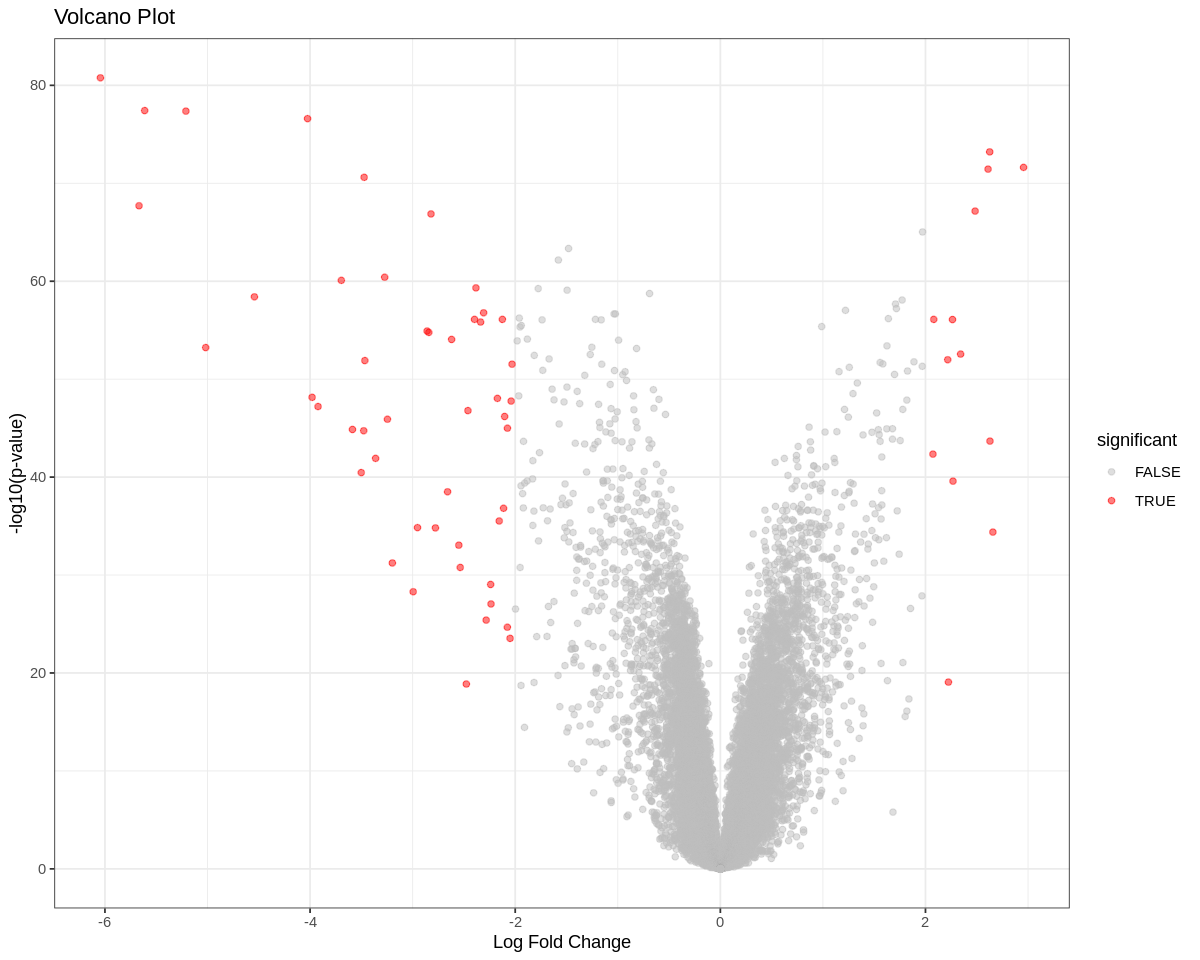

In [ ]:
library(ggplot2)
results <- topTable(fit2, number=Inf)
results$signif <- -log10(results$adj.P.Val)

results$significant <- abs(results$logFC) > 2 & results$adj.P.Val < 0.01

# Volcano plot 생성
volcano <- ggplot(results, aes(x = logFC, y = signif)) +
  geom_point(aes(colour = significant), alpha = 0.5) +
  scale_colour_manual(values = c("gray", "red")) +
  labs(x = "Log Fold Change", y = "-log10(p-value)", title = "Volcano Plot") +
  theme_bw()

options(repr.plot.width = 10, repr.plot.height = 8)
print(volcano)